In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import pandas as pd

In [50]:
seed = 0
planet_max_size = 25
rng = np.random.RandomState(seed)

(array([0.1775    , 0.01458333, 0.01291667, 0.00458333, 0.00333333,
        0.00666667, 0.00375   , 0.01333333, 0.0125    , 0.1675    ]),
 array([ 1. ,  3.4,  5.8,  8.2, 10.6, 13. , 15.4, 17.8, 20.2, 22.6, 25. ]),
 <BarContainer object of 10 artists>)

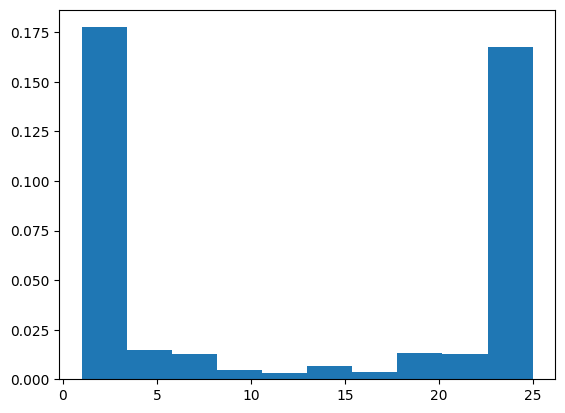

In [51]:
# beta distribution plot - Jovian world size
a = b = 0.1
samples = 1000
beta = rng.beta(a, b, samples)
beta = MinMaxScaler(feature_range=(1, planet_max_size)).fit_transform(
    beta.reshape(-1, 1)
)

# convert to int
beta = beta.astype(int)

plt.hist(beta, density=True)

(array([0.39      , 0.01125   , 0.01      , 0.00208333, 0.00125   ,
        0.00125   , 0.        , 0.00041667, 0.        , 0.00041667]),
 array([ 1. ,  3.4,  5.8,  8.2, 10.6, 13. , 15.4, 17.8, 20.2, 22.6, 25. ]),
 <BarContainer object of 10 artists>)

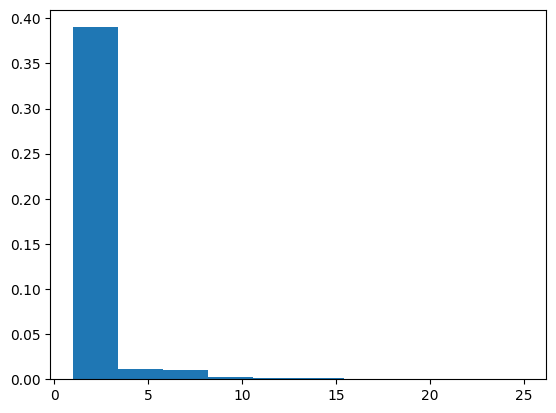

In [52]:
# gamma distribution plot - icy worlds size
target_mean = 2.5
k = 0.1
theta = target_mean / k
samples = 1000
gamma = rng.gamma(k, theta, samples)
# rescale to between 1 and 25 (just shift and scale)
gamma = MinMaxScaler(feature_range=(1, planet_max_size)).fit_transform(
    gamma.reshape(-1, 1)
)

# convert to int
gamma = gamma.astype(int)

plt.hist(gamma, density=True)

(6000,)


(array([0.00026667, 0.00386667, 0.02813333, 0.02453333, 0.00973333,
        0.0028    , 0.072     , 0.13566667, 0.11366667, 0.00933333]),
 array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. , 22.5, 25. ]),
 <BarContainer object of 10 artists>)

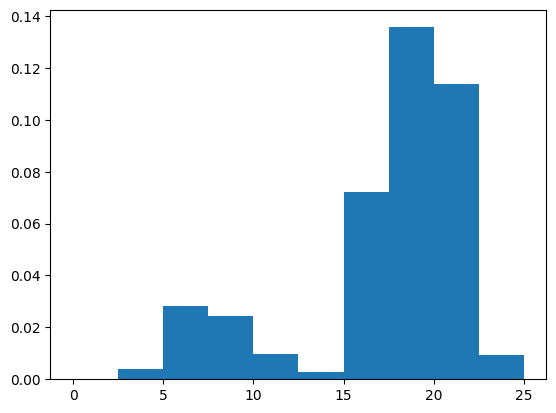

In [53]:
# sol like world size - two gaussians combined
mu1 = 1
seperation = 3
sigma = 0.5
repeats = 5
mu2 = mu1 + seperation
samples = 1000
gauss1 = rng.normal(mu1, sigma, samples)
gauss2 = rng.normal(mu2, sigma, samples)
gauss = np.concatenate((gauss1, np.repeat(gauss2, 5)))

print(gauss.shape)

# rescale to between 1 and 25 (just shift and scale)
gauss = MinMaxScaler(feature_range=(1, planet_max_size)).fit_transform(
    gauss.reshape(-1, 1)
)

# convert to int
gauss = gauss.astype(int)

plt.hist(gauss, density=True)

The slope is [0.03] and the intercept is 1.0658141036401503e-14
33.333333333333336


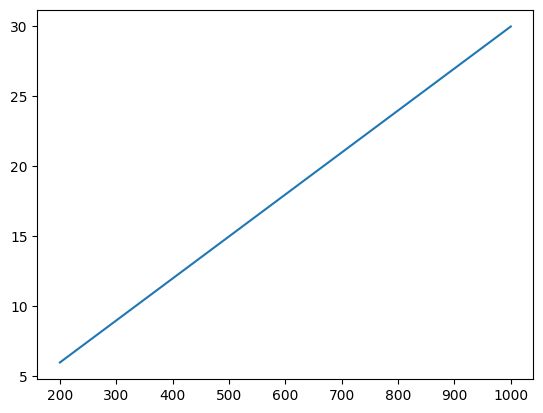

In [54]:
x = [200, 400, 600, 800, 1000]
y = [6, 12, 18, 24, 30]

# lin reg
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(np.array(x).reshape(-1, 1), y)
print(f"The slope is {reg.coef_} and the intercept is {reg.intercept_}")

print(800 / 24)

plt.plot(x, y)

In [55]:
stars = [1, 2, 3, 4, 5]

a = np.random.randn(10, 2)
b = np.random.randn(
    10,
)

print(a.shape)
print(b.shape)

np.concatenate((a, b.reshape(-1, 1)), axis=1)

(10, 2)
(10,)


array([[ 0.33745988,  0.46972891,  0.42529375],
       [-1.37837703, -0.30982278,  1.23693306],
       [ 0.01342189,  0.3323623 ,  1.14831458],
       [ 0.9318986 , -2.32932054, -0.58447175],
       [ 0.48630398,  0.86394952,  0.41513609],
       [ 0.74724815,  0.64552265, -0.74993721],
       [ 1.67048998,  0.51929488,  1.26684635],
       [ 1.35803762,  0.33993466, -0.9293631 ],
       [-2.09953048,  0.89267335, -1.79667282],
       [ 1.21765308, -0.0345729 ,  0.91152984]])

2023-11-21 14:25:02,132 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2023-11-21 14:25:02,132 INFO sqlalchemy.engine.Engine PRAGMA foreign_keys=ON
2023-11-21 14:25:02,133 INFO sqlalchemy.engine.Engine [generated in 0.00063s] ()
2023-11-21 14:25:02,135 INFO sqlalchemy.engine.Engine SELECT planet.planet_size AS planet_planet_size 
FROM planet
2023-11-21 14:25:02,135 INFO sqlalchemy.engine.Engine [generated in 0.00097s] ()
Min planet size: 2
Max planet size: 25
2023-11-21 14:25:02,307 INFO sqlalchemy.engine.Engine COMMIT


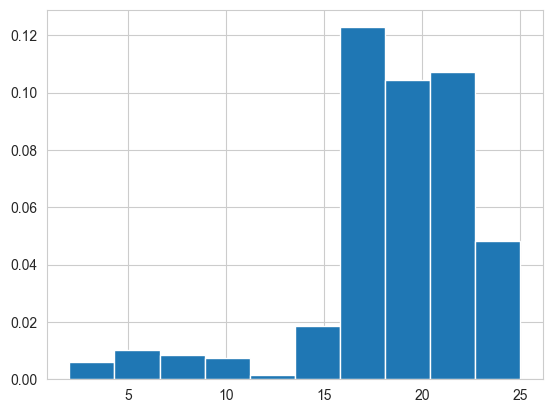

In [142]:
from src.models import Planet
from src.database.db import get_session
from sqlalchemy import create_engine

db = "../../data/sqlite.db"

engine = create_engine(f"sqlite:///{db}", echo=True)


def plot_planet_size_dist():
    with get_session(engine) as session:
        all_planets = session.query(Planet.planet_size).all()
        all_planets = np.array(all_planets).flatten()

        # print the min and max size
        print(f"Min planet size: {np.min(all_planets)}")
        print(f"Max planet size: {np.max(all_planets)}")

        plt.hist(all_planets, density=True)


plot_planet_size_dist()

In [57]:
# print cwd
import os

print(os.getcwd())

/Users/ac4294/dev/2023/spaceships-database/src/scratch


In [58]:
rng.binomial(1, 0.5, 10)

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 1])

2023-11-22 13:04:10,976 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2023-11-22 13:04:10,977 INFO sqlalchemy.engine.Engine PRAGMA foreign_keys=ON
2023-11-22 13:04:10,978 INFO sqlalchemy.engine.Engine [cached since 2.615e+04s ago] ()
2023-11-22 13:04:10,979 INFO sqlalchemy.engine.Engine SELECT biome.biome_name AS biome_biome_name, count(planet.planet_biome) AS count_1 
FROM biome JOIN planet ON biome.biome_id = planet.planet_biome GROUP BY biome.biome_name
2023-11-22 13:04:10,979 INFO sqlalchemy.engine.Engine [cached since 2.615e+04s ago] ()
Total habitable planets: 776 out of 68493 (0.36%)
Total special planets: 56 out of 68493 (0.01%)
Total habitable + special planets: 832 out of 68493 (0.37%)
              biome_name  count
11             Ice Giant  50093
8              Gas Giant  13714
17           Toxic World    914
13          Molten World    891
12      Icy Barren World    849
1           Barren World    841
2           Broken World    294
18             Wet World    264
6     

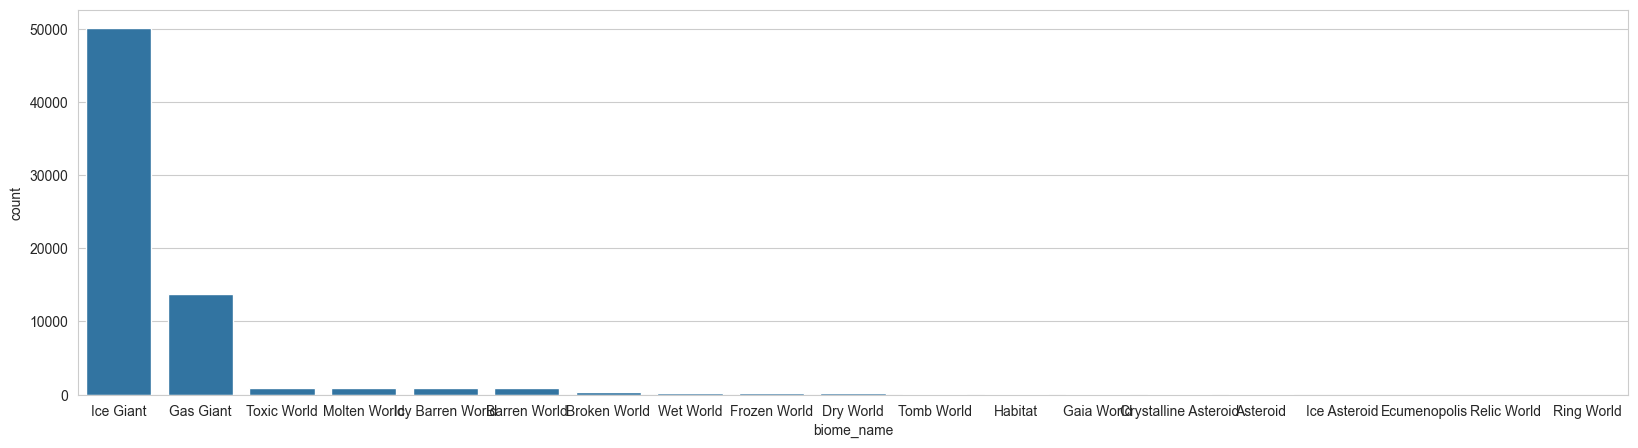

In [353]:
from sqlalchemy import func
from src.models import Biome


def plot_planet_by_biome():
    with get_session(engine) as session:
        # get:
        """
        SELECT biome.biome_name, COUNT(planet.biome_id) AS count
        FROM planet
        INNER JOIN biome ON planet.biome_id = biome.biome_id
        """
        biome_count = (
            session.query(Biome.biome_name, func.count(Planet.planet_biome))
            .join(Planet)
            .group_by(Biome.biome_name)
            .all()
        )

        # convert to df
        biome_count = pd.DataFrame(
            biome_count, columns=["biome_name", "count"]
        )

        # print number habitable (Dry World, Frozen World, Wet World)
        habitable = biome_count[
            biome_count["biome_name"].isin(
                ["Dry World", "Frozen World", "Wet World"]
            )
        ]
        pct_habitable = habitable["count"] / biome_count["count"].sum()
        print(
            f"Total habitable planets: {habitable['count'].sum()} out of {biome_count['count'].sum()}",
            f"({pct_habitable.values[0] * 100:.2f}%)",
        )

        # # prin number special worlds (Gaia, Tomb, Ecumenopolis, Ringworld)
        special = biome_count[
            biome_count["biome_name"].isin(
                ["Gaia World", "Tomb World", "Ecumenopolis", "Ring World"]
            )
        ]
        pct_special = special["count"] / biome_count["count"].sum()
        print(
            f"Total special planets: {special['count'].sum()} out of {biome_count['count'].sum()}",
            f"({pct_special.values[0] * 100:.2f}%)",
        )

        print(
            f"Total habitable + special planets: {habitable['count'].sum() + special['count'].sum()} out of {biome_count['count'].sum()}",
            f"({(pct_habitable.values[0] + pct_special.values[0]) * 100:.2f}%)",
        )

        # print total sorted ascending
        biome_count = biome_count.sort_values(by="count", ascending=False)
        print(biome_count)

        # plot (increase size)

        plt.figure(figsize=(20, 5))
        sns.barplot(x="biome_name", y="count", data=biome_count)


plot_planet_by_biome()

In [60]:
31 + 17 + 24

72

In [68]:
5 // 2

2

In [90]:
foo = pd.DataFrame(
    [
        {
            "mean_num_success": 3,
        },
        {
            "mean_num_success": 5,
        },
        {
            "mean_num_success": 49,
        },
    ]
)

n_trials = 50
bern = np.random.binomial(
    1, foo["mean_num_success"] / n_trials, (n_trials, len(foo))
)

np.sum(bern, axis=0)

array([ 2,  1, 50])

In [75]:
rng.binomial(10, 0.5, 1000)

array([ 5,  6,  5,  2,  6,  6,  6,  4,  3,  9,  5,  6,  3,  5,  5,  3,  4,
        7,  6,  6,  7,  4,  6,  3,  5,  5,  5,  4,  5,  7,  6,  5,  8,  6,
        2,  6,  6,  2,  7,  5,  4,  5,  7,  4,  7,  3,  3,  5,  5,  6,  2,
        4,  6,  4,  4,  6,  6,  6,  6,  8,  2,  3,  5,  4,  4,  8,  2,  2,
        7,  3,  2,  5,  7,  4,  7,  7,  4,  5,  7,  3,  3,  4,  4,  4,  2,
        6,  3,  5,  3,  4,  5,  7,  6,  7,  5,  3,  5,  5,  5,  7,  5,  4,
        8,  4,  5,  7,  6,  5,  6,  5,  5,  6,  6,  7,  7,  8,  3,  9,  4,
        3,  6,  6,  8,  6,  5,  5,  5,  6,  5,  5,  6,  4,  4,  3,  6,  3,
        4,  7,  5,  4,  9,  7,  3,  4,  6,  4,  5,  3,  6,  5,  8,  3,  5,
        4,  5,  4,  7,  5,  5,  6,  7,  5,  6,  3,  4,  6,  7,  3,  3,  8,
        3,  2,  5,  4,  4,  5,  4,  9,  4,  7,  7,  5,  9,  4,  3,  5,  1,
        5,  7,  5,  4,  4,  7,  6,  3,  5,  5,  5,  6,  1,  4,  5,  5,  3,
        4,  6,  5,  6,  6,  5,  4,  5,  3,  4,  6,  2,  0,  7,  8,  7,  4,
        6,  5,  3,  6,  6

In [133]:
rng.choice(20, 10, replace=False)

array([13,  2,  1,  3, 17, 11, 10, 14,  4,  9])

In [174]:
mus = [2, 1.5, 0, 5]
sigmas = [3, 2, 2, 5]

materials = (
    rng.normal(
        loc=mus,
        scale=sigmas,
        size=(50, len(mus)),
    )
    .clip(0)
    .astype(int)
)
materials

array([[ 7,  1,  0,  8],
       [ 0,  1,  0,  4],
       [ 2,  1,  2,  0],
       [ 7,  2,  0,  0],
       [ 0,  4,  0,  7],
       [ 2,  2,  0,  0],
       [ 5,  2,  0,  0],
       [ 5,  0,  0,  0],
       [ 3,  3,  0,  9],
       [ 0,  3,  0,  4],
       [ 0,  0,  0,  0],
       [ 2,  0,  0,  2],
       [ 1,  0,  0,  7],
       [ 0,  1,  4, 10],
       [ 1,  0,  5,  5],
       [ 4,  0,  0,  6],
       [10,  4,  3,  0],
       [ 2,  0,  0,  4],
       [ 1,  3,  0, 12],
       [ 0,  0,  0,  0],
       [ 4,  0,  0,  6],
       [ 1,  0,  0,  2],
       [ 0,  0,  0,  7],
       [ 0,  0,  0,  0],
       [ 2,  0,  0, 14],
       [ 2,  0,  0,  2],
       [ 0,  0,  0,  2],
       [ 7,  3,  0,  2],
       [ 0,  0,  0,  4],
       [ 0,  1,  1,  7],
       [ 0,  2,  0,  6],
       [ 2,  0,  0,  4],
       [ 2,  3,  0,  0],
       [ 3,  3,  2,  1],
       [ 2,  2,  1,  0],
       [ 0,  4,  0,  8],
       [ 2,  0,  0,  0],
       [ 1,  3,  0,  4],
       [ 5,  2,  0,  8],
       [ 2,  1,  0,  1],


In [180]:
material_to_col = {
    0: "planet_minerals_value",
    1: "planet_energy_value",
    2: "planet_research_value",
    3: "planet_trade_value",
}

col_to_material = {v: k for k, v in material_to_col.items()}

col_idx = np.vectorize(col_to_material.get)(
    rng.choice(
        [
            "planet_trade_value",
            "planet_energy_value",
        ],
        size=50,
        replace=True,
    )
)

np.eye(len(material_to_col))[col_idx]
# # one hot encode
# col_idx = np.eye(len(material_to_col))[col_idx]
# materials * col_idx
# col_idx

array([[0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],


In [352]:
one_hot_materials = np.zeros((len(material_to_col),))
one_hot_materials[
    np.vectorize(col_to_material.get)(
        [
            "planet_trade_value",
            "planet_energy_value",
        ]
    )
] = 1
# repeat for all planets
one_hot_materials = np.repeat(one_hot_materials.reshape(1, -1), 50, axis=0)
one_hot_materials

array([[0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],


In [183]:
import networkx as nx

[13 10 11 11 13 13  8  8 14 14]
[0.40837003 0.35644078 0.39812619 0.2816484  0.45214083 0.49130415
 0.15071274 0.25125295 0.43918501 0.45735425]


Generating hyperlane map with density 0.5 and 1000 clusters
Generating hyperlane map with density 0.5833333333333334 and 1000 clusters
Generating hyperlane map with density 0.6666666666666666 and 1000 clusters
Generating hyperlane map with density 0.75 and 1000 clusters
Generating hyperlane map with density 0.8333333333333333 and 1000 clusters
Generating hyperlane map with density 0.9166666666666666 and 1000 clusters
Generating hyperlane map with density 1.0 and 1000 clusters
Generating hyperlane map with density 1.0833333333333333 and 1000 clusters
Generating hyperlane map with density 1.1666666666666665 and 1000 clusters
Generating hyperlane map with density 1.25 and 1000 clusters
Generating hyperlane map with density 1.3333333333333333 and 1000 clusters
Generating hyperlane map with density 1.4166666666666665 and 1000 clusters
Generating hyperlane map with density 1.5 and 1000 clusters
Generating hyperlane map with density 1.5833333333333333 and 1000 clusters
Generating hyperlane ma

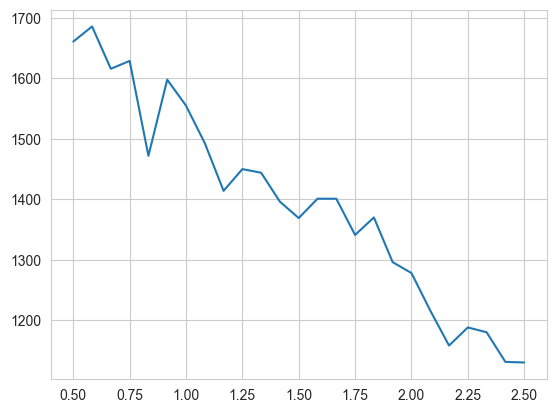

In [345]:
# min_nodes = 7
# max_nodes = 10
n_gen = 20

# n_nodes = rng.randint(min_nodes, max_nodes, n_gen)
#
# max_p = .7
# min_p = .15
# slope = (max_p - min_p) / (max_nodes - min_nodes)
# intercept = max_p - slope * max_nodes
#
# p_vals = n_nodes * slope + intercept + rng.normal(0, .05, n_nodes.shape)

rng = np.random.RandomState(0)


def generate_hyperlane_map(hyperlane_density: float, n_gen: int = 20):
    print(
        f"Generating hyperlane map with density {hyperlane_density} and {n_gen} clusters"
    )
    pvals = rng.normal(0.25, 0.005, n_gen)

    # mean number of edges to draw between clusters
    hyperlanes_between_cluster = rng.poisson(hyperlane_density + 1, n_gen)

    nodes_per_cluster = 12
    clusters = [
        nx.fast_gnp_random_graph(nodes_per_cluster, p, seed=rng) for p in pvals
    ]
    # relabel the nodes
    clusters = [
        nx.relabel_nodes(g, {n: f"node_{i}_{n}" for n in g.nodes})
        for i, g in enumerate(clusters)
    ]

    def connect_graph(ind_g: nx.Graph):
        while not nx.is_connected(ind_g):
            # get the connected components
            connected_components = list(nx.connected_components(ind_g))
            # get the nodes in the first component
            nodes = list(connected_components[0])
            # get the nodes in the second component
            nodes2 = list(connected_components[1])
            # add an edge between the two nodes
            ind_g.add_edge(nodes[0], nodes2[0])

    # make sure each individual clusters is connected - if disconnected, add edges until connected
    for g in clusters:
        connect_graph(g)

    combined = nx.compose_all(clusters)

    # # add hyperlanes between clusters
    # print(len(list(nx.connected_components(combined))) == len(hyperlanes_between_cluster))

    connected_components = list(nx.connected_components(combined))
    for i, (cc, n_hyper) in enumerate(
        zip(connected_components, hyperlanes_between_cluster)
    ):
        j = i + 1 if i + 1 < len(connected_components) else 0

        cc2 = connected_components[j]
        n_conn = min(len(cc), len(cc2), n_hyper)

        # randomly choose n_hyper nodes from each cluster
        nodes1 = rng.choice(list(cc), n_conn, replace=False)
        nodes2 = rng.choice(
            list(connected_components[j]), n_conn, replace=False
        )

        # add edges between the two nodes
        for n1, n2 in zip(nodes1, nodes2):
            combined.add_edge(n1, n2)

    connect_graph(combined)

    return np.array([len(list(combined.neighbors(n))) for n in combined.nodes])

    # ax, fig = plt.subplots(figsize=(25, 20))
    #
    # # plot the combined graph - shrink the nodes and the labels
    # nx.draw(combined, with_labels=True, node_size=50, font_size=8, ax=fig)
    # plt.show()
    #
    # # plot the number of edges per vertex (in a new plot)
    # edges_per_vertex = np.array([len(list(combined.neighbors(n))) for n in combined.nodes])
    # plt.hist(edges_per_vertex, density=True)


densities = np.linspace(0.5, 2.5, 25)
infos = [generate_hyperlane_map(d, 1000) for d in densities]
# plot number of vertices with 1 edge vs density
plt.plot(densities, [np.sum(i == 1) for i in infos])

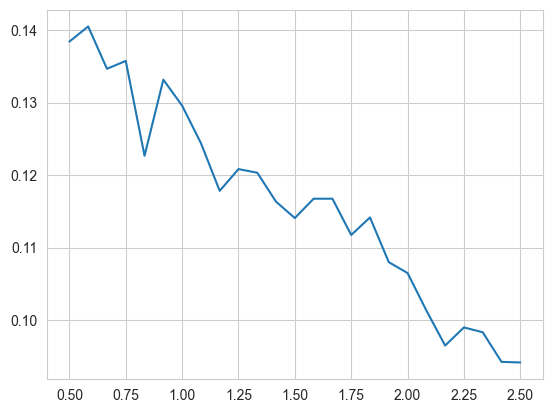

In [346]:
# basically - there is a linear relationship between hyperlane density and the number of vertices with 1 edge
infos_pct = [np.sum(i == 1) / len(i) for i in infos]
plt.plot(densities, infos_pct)

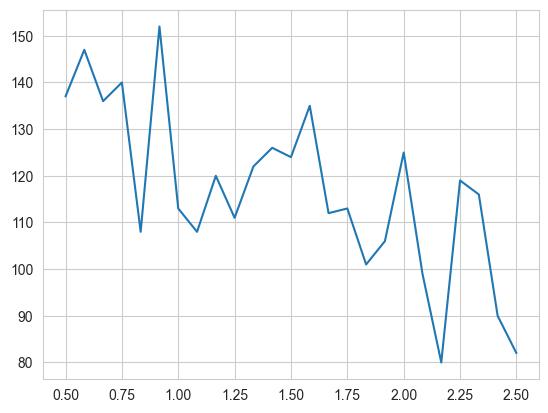

In [347]:
is_chokepoint = rng.binomial(1, infos_pct, (1000, len(infos_pct)))
# get the number of chokepoints vs hyperlane density
plt.plot(densities, np.sum(is_chokepoint, axis=0))

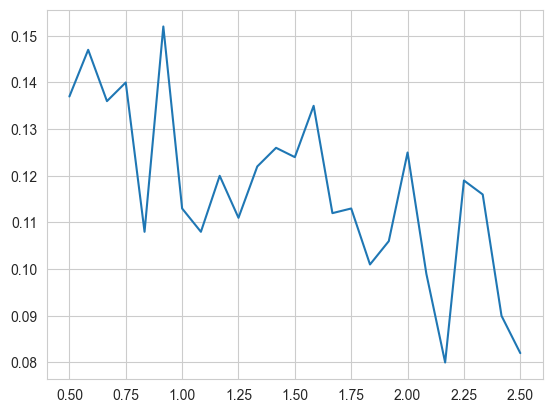

In [349]:
# plot pct of chokepoints vs hyperlane density
plt.plot(densities, np.sum(is_chokepoint, axis=0) / is_chokepoint.shape[0])

In [350]:
is_chokepoint.astype(bool)

array([[False, False, False, ..., False, False,  True],
       [False, False, False, ..., False, False, False],
       [False, False, False, ...,  True, False, False],
       ...,
       [False, False,  True, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

NameError: name 'pd' is not defined